Accuracy: 0.870000

Evaluasi Model:
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        63
           1       0.85      0.78      0.82        37

    accuracy                           0.87       100
   macro avg       0.87      0.85      0.86       100
weighted avg       0.87      0.87      0.87       100


Confusion Matrix:


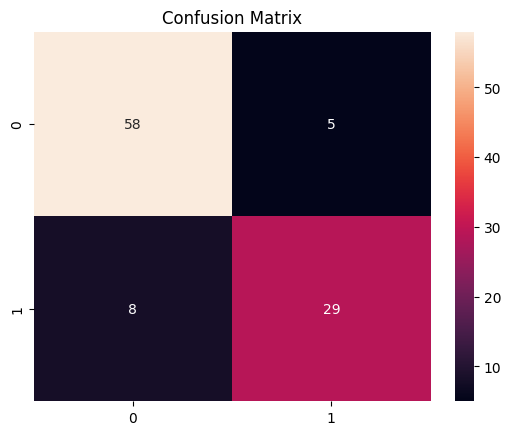

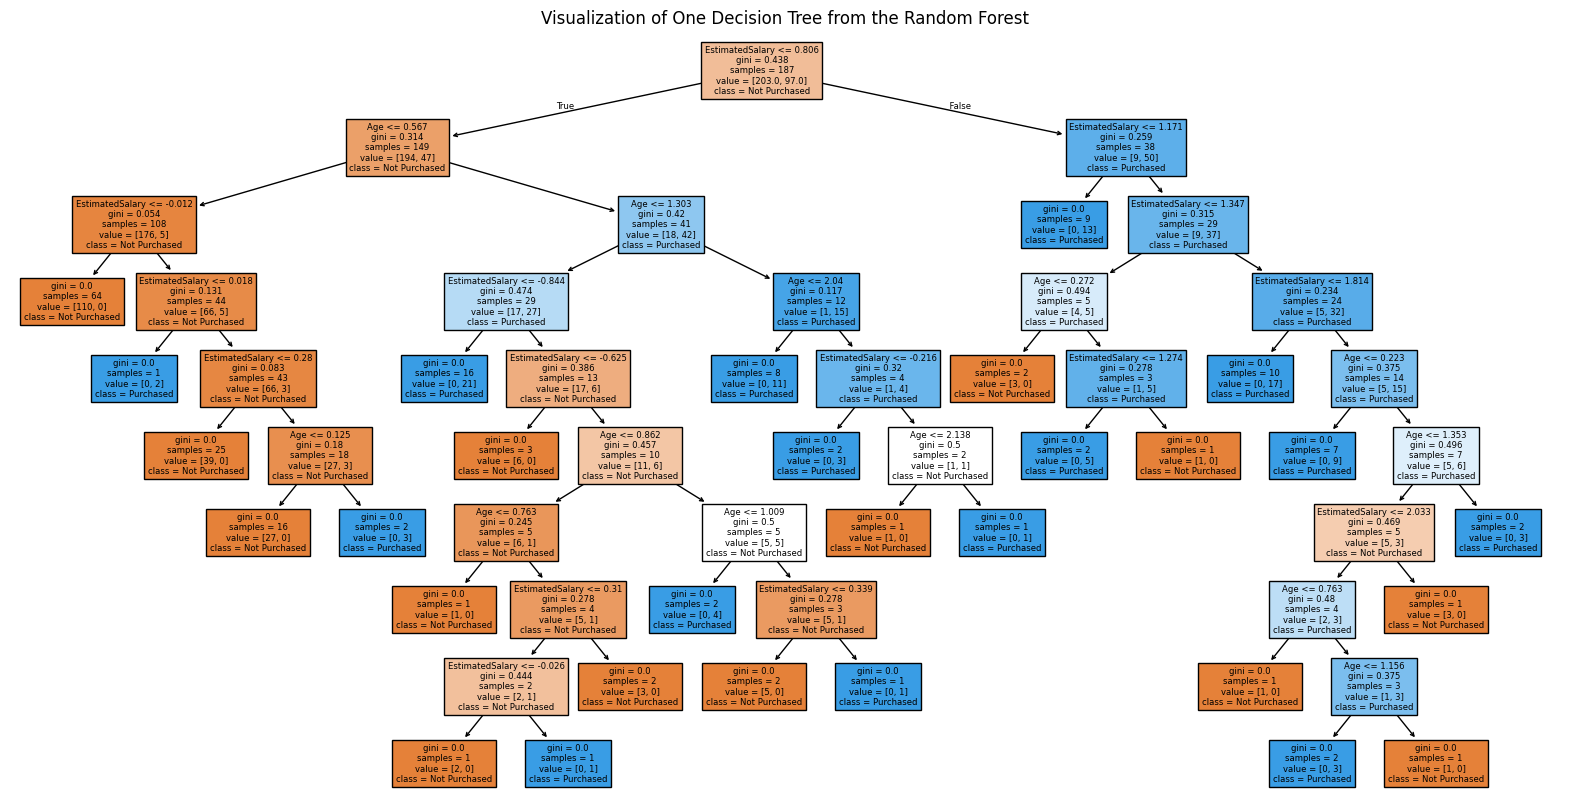

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import plot_tree

# Step 1: Load dataset
df = pd.read_csv('Social_Network_Ads.csv')

# Step 2: Preprocessing
# Drop User ID if present
if 'User ID' in df.columns:
    df = df.drop('User ID', axis=1)

# Convert Gender to numeric
#df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Define features and target
X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 3: Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=10, random_state=42)
rf.fit(X_train, y_train)

# Step 4: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_score(y_test, y_pred):2f}")
print("\nEvaluasi Model:")
y_pred = rf.predict(X_test)
print("Classification Report:")

print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

# Step 5: Visualize one decision tree from the forest
plt.figure(figsize=(20,10))
plot_tree(rf.estimators_[0], feature_names=X.columns, class_names=["Not Purchased", "Purchased"], filled=True)
plt.title("Visualization of One Decision Tree from the Random Forest")
plt.show()


In [2]:
from google.colab import files
uploaded = files.upload()

Saving Social_Network_Ads.csv to Social_Network_Ads.csv
